# 1. 데이터 import

In [36]:
# Packages for EDA 
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd 
import numpy as np 

# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import re 

# Modeling and evaluation 
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (
    BaggingClassifier,
    ExtraTreesClassifier,
    RandomForestClassifier,
    StackingClassifier,
    HistGradientBoostingClassifier
)
from xgboost import XGBClassifier
from sklearn.metrics import classification_report 
import joblib

# Packages options 
sns.set(rc={'figure.figsize': [14, 7]}, font_scale=1.2) # Standard figure size for all 
np.seterr(divide='ignore', invalid='ignore', over='ignore') ;

import warnings 
warnings.filterwarnings("ignore")

In [4]:
# from google.colab import drive # 드라이브에서 파일 가져오는 방식
# drive.mount("/content/drive")

# filename = "/content/drive/MyDrive/해커톤/Preprocessed_final_Data.csv"
# df = pd.read_csv(filename, index_col=0)
# df.head(3)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,0,1,0,0,0,0,1,0,0,0
1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1.0,7.0,11.27,...,0,1,0,0,0,0,0,1,0,0
2,33.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,6.27,...,0,1,0,0,0,0,0,0,1,0
3,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,5.0,4.0,6.27,...,0,1,0,0,0,0,0,0,0,1
4,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,6.0,7.0,11.27,...,0,1,0,0,0,1,0,0,0,0


In [2]:
df = pd.read_csv('./csv/Preprocessed_final_Data.csv', index_col=0)
df.head(3)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,0,1,0,0,0,0,1,0,0,0
1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1.0,7.0,11.27,...,0,1,0,0,0,0,0,1,0,0
2,33.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,6.27,...,0,1,0,0,0,0,0,0,1,0


---
# 1. Feature Selection
- T-test로 p-value 0.05 이하인 값 확인 (하지말자~)

## 1-1. feature_importance로 변수 중요도 확인

In [3]:
target= 'Delay_from_due_date'
y = df[target] # 종속변인 추출
X = df.drop(target, axis=1) # 종속변인+중복컬럼 제외

for i in range(len(y)):
    if y[i] <= 5 :
        y[i] = 0
    elif y[i] <= 90:
        y[i] = 1
    else:
        pass

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

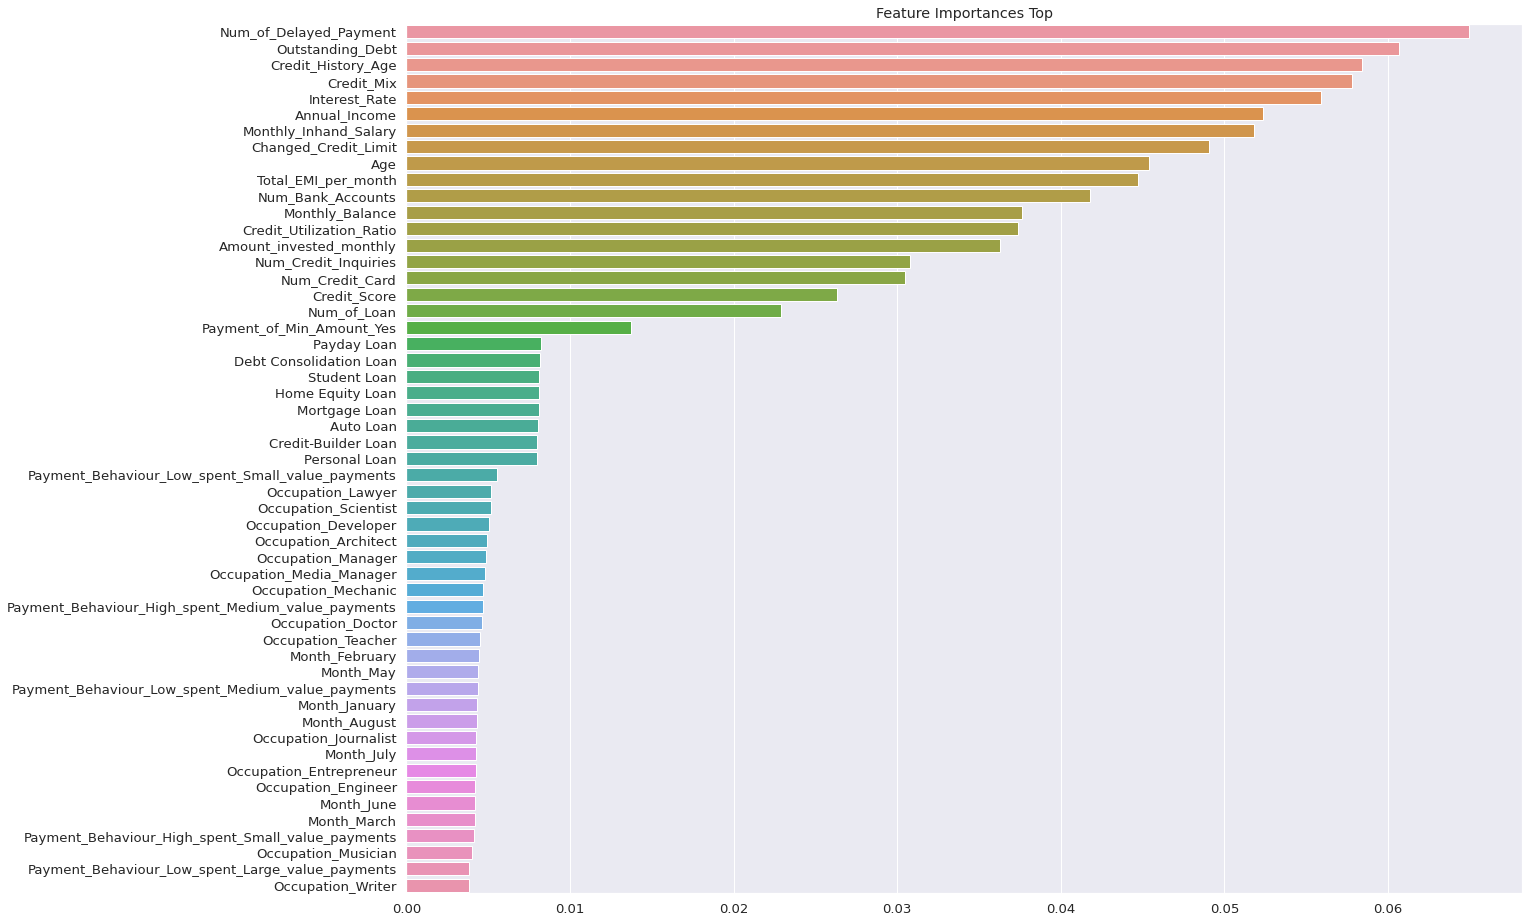

In [6]:
# feature imfortance 찍어보기

model = RandomForestClassifier(n_jobs=-1)
model.fit(X_train, y_train)
#feature 중요도도 그려볼 수 있다. 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df_non_label = X
# del df_non_label["Delay_from_due_date"]
# df_non_label.columns

feature_importances_values = model.feature_importances_
feature_importances = pd.Series(feature_importances_values, index=df_non_label.columns)
feature_importances_top20 = feature_importances.sort_values(ascending=False)[:53] #중요한 순서로 정렬 후 top 20개만 뽑아 시각화

plt.figure(figsize=(20, 16))
plt.title('Feature Importances Top')
sns.barplot(x=feature_importances_top20, y=feature_importances_top20.index)
plt.show()

## 1-2. 히트맵으로 상관관계 확인 (feature_importance에서 낮은 값 날리고 확인)

In [ ]:
# filename = "/content/drive/MyDrive/해커톤/Preprocessed_final_Data.csv"
# df = pd.read_csv(filename, index_col=0)
# df.head(3)

In [4]:
# df = pd.read_csv('./csv/Preprocessed_final_Data.csv', index_col=0)
Loan_list = ['Credit-Builder Loan', 'Personal Loan', 'Debt Consolidation Loan', 'Student Loan', 'Payday Loan', 'Mortgage Loan', 'Auto Loan', 'Home Equity Loan']
Month_list=['Month_August','Month_February','Month_January','Month_July','Month_June','Month_March','Month_May']
PB_list = ['Payment_Behaviour_High_spent_Medium_value_payments', 'Payment_Behaviour_High_spent_Small_value_payments', 'Payment_Behaviour_Low_spent_Large_value_payments', 'Payment_Behaviour_Low_spent_Medium_value_payments', 'Payment_Behaviour_Low_spent_Small_value_payments']
OC_list = ['Occupation_Architect', 'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager', 'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher', 'Occupation_Writer']

df = df.drop(OC_list, axis=1)
df = df.drop(PB_list, axis=1)
df = df.drop(Loan_list, axis=1)
df = df.drop(Month_list, axis=1)

target = "Delay_from_due_date"
X = df.drop(target, axis=1)
y = df[target]


In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(X.corr(), annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.show()

In [ ]:
X.drop(["Monthly_Inhand_Salary", "Credit_Mix"], inplace=True, axis=1)
plt.figure(figsize=(20, 20))
sns.heatmap(X.corr(), annot=True, cmap='Blues', vmin=-1, vmax=1)
plt.show()

## 1-3. VIF로 다중공선성 확인

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index=X.columns, columns=['VIF'])
vif.sort_values(by='VIF', ascending=False)

### 1-3-1. VIF제거하면서 정확도 확인

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model_lr = LogisticRegression(C=1.0, solver='lbfgs', max_iter=100, n_jobs=None)

def get_clf_eval(y_test, pred=None, pred_proba=None):
    accuracy = accuracy_score(y_test, pred)
    print("accuracy:", accuracy)
    df_ac = pd.DataFrame({'VIF': [accuracy]})
    df_ac.index = ["Accuracy"]
    return df_ac

df_copy = df
drop_column = ["Monthly_Inhand_Salary", "Credit_Mix"]
target = "Delay_from_due_date"
drop_list = [target]
drop_list.extend(drop_column)
y = df_copy[target]
X = df_copy.drop(drop_list, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

model_lr.fit(X_train, y_train)
pred = model_lr.predict(X_test)
pred_proba = model_lr.predict_proba(X_test)[:, 1]


from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index=X.columns, columns=['VIF'])
vif = pd.concat([vif, get_clf_eval(y_test, pred, pred_proba)], axis=0)

vif.sort_values(by='VIF', ascending=False)

accuracy: 0.07365


,VIF
Credit_Utilization_Ratio,27.323959
Num_Credit_Card,11.670482
Num_Bank_Accounts,10.912517
Age,10.525386
Num_of_Delayed_Payment,10.126854
Monthly_Balance,10.036196
Credit_History_Age,9.686416
Interest_Rate,9.189369
Num_Credit_Inquiries,6.975091
Outstanding_Debt,5.323010


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model_lr = LogisticRegression(C=1.0, solver='lbfgs', max_iter=100, n_jobs=None)

def get_clf_eval(y_test, pred=None, pred_proba=None):
    accuracy = accuracy_score(y_test, pred)
    print("accuracy:", accuracy)
    df_ac = pd.DataFrame({'VIF': [accuracy]})
    df_ac.index = ["Accuracy"]
    return df_ac

df_copy = df
drop_column = ["Monthly_Inhand_Salary", "Credit_Mix", "Credit_Utilization_Ratio", "Num_Credit_Card", "Num_Bank_Accounts"]
target = "Delay_from_due_date"
drop_list = [target]
drop_list.extend(drop_column)
y = df_copy[target]
X = df_copy.drop(drop_list, axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

model_lr.fit(X_train, y_train)
pred = model_lr.predict(X_test)
pred_proba = model_lr.predict_proba(X_test)[:, 1]


from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame(
    [variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
    index=X.columns, columns=['VIF'])
vif = pd.concat([vif, get_clf_eval(y_test, pred, pred_proba)], axis=0)

vif.sort_values(by='VIF', ascending=False)

accuracy: 0.0731


,VIF
Age,9.588422
Monthly_Balance,9.264401
Num_of_Delayed_Payment,8.598398
Interest_Rate,8.498661
Credit_History_Age,8.183454
Num_Credit_Inquiries,6.587120
Outstanding_Debt,5.080757
Annual_Income,4.621097
Changed_Credit_Limit,4.407104
Payment_of_Min_Amount_Yes,3.843823


## 1-4. (1-1, 1-2, 1-3)의 해당 변수로 피쳐 선정 후 해당 df 생성

In [8]:
# filename = "/content/drive/MyDrive/해커톤/Preprocessed_final_Data.csv"
# df = pd.read_csv(filename, index_col=0)
# df.head(3)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Occupation_Musician,Occupation_Scientist,Occupation_Teacher,Occupation_Writer,Payment_of_Min_Amount_Yes,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
0,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,11.27,...,0,1,0,0,0,0,1,0,0,0
1,23.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,-1.0,7.0,11.27,...,0,1,0,0,0,0,0,1,0,0
2,33.0,19114.12,1824.843333,3.0,4.0,3.0,4.0,3.0,7.0,6.27,...,0,1,0,0,0,0,0,0,1,0


In [5]:
df = pd.read_csv('./csv/Preprocessed_final_Data.csv', index_col=0)

Loan_list = ['Credit-Builder Loan', 'Personal Loan', 'Debt Consolidation Loan', 'Student Loan', 'Payday Loan', 'Mortgage Loan', 'Auto Loan', 'Home Equity Loan']
Month_list=['Month_August','Month_February','Month_January','Month_July','Month_June','Month_March','Month_May']
PB_list = ['Payment_Behaviour_High_spent_Medium_value_payments', 'Payment_Behaviour_High_spent_Small_value_payments', 'Payment_Behaviour_Low_spent_Large_value_payments', 'Payment_Behaviour_Low_spent_Medium_value_payments', 'Payment_Behaviour_Low_spent_Small_value_payments']
OC_list = ['Occupation_Architect', 'Occupation_Developer', 'Occupation_Doctor', 'Occupation_Engineer', 'Occupation_Entrepreneur', 'Occupation_Journalist', 'Occupation_Lawyer', 'Occupation_Manager', 'Occupation_Mechanic', 'Occupation_Media_Manager', 'Occupation_Musician', 'Occupation_Scientist', 'Occupation_Teacher', 'Occupation_Writer']

df = df.drop(OC_list, axis=1)
df = df.drop(PB_list, axis=1)
df = df.drop(Loan_list, axis=1)
df = df.drop(Month_list, axis=1)

# heatmap에서 drop한 1개컬럼, VIF에서 drop한 5개 컬럼
df_final = df.drop(["Monthly_Inhand_Salary", "Credit_Mix", "Credit_Utilization_Ratio", "Num_Credit_Card", "Num_Bank_Accounts"], axis=1)
df_final
df_final.to_csv('./csv/Selected_feature_data(다중분류).csv') # csv로 추출

# 2. Scaling, y클래스화, Data split, Resampling

In [37]:
# 피쳐셀렉 끝난 data 가져오기

df_sf = pd.read_csv('./csv/Selected_feature_data(다중분류).csv', index_col = 0)
print(df_sf.shape)
df_sf.head()
# df_sf.describe()
# df_sf.info()
# df_sf.describe().T

(100000, 15)


,Age,Annual_Income,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Payment_of_Min_Amount_Yes
0,23.0,19114.12,3.0,4.0,3.0,7.0,11.27,4.0,809.98,265.0,49.574949,80.415295,312.494089,2,0
1,23.0,19114.12,3.0,4.0,-1.0,7.0,11.27,4.0,809.98,265.0,49.574949,118.280222,284.629162,2,0
2,33.0,19114.12,3.0,4.0,3.0,7.0,6.27,4.0,809.98,267.0,49.574949,81.699521,331.209863,2,0
3,23.0,19114.12,3.0,4.0,5.0,4.0,6.27,4.0,809.98,268.0,49.574949,199.458074,223.451310,2,0
4,23.0,19114.12,3.0,4.0,6.0,7.0,11.27,4.0,809.98,269.0,49.574949,41.420153,341.489231,2,0


## 2-1. y 다중클래스화(0,1,2,3)

In [38]:
target = 'Delay_from_due_date'
y = df_sf[target] # 종속변인 추출
X = df_sf.drop(target, axis=1)

In [39]:
for i in range(len(y)):
    if y[i] <= 0 :
        y[i] = 0
    elif y[i] < 5:
        y[i] = 1
    elif y[i] < 30:
        y[i] = 2
    else:
        y[i] = 3

y=y.astype("int")
y.value_counts()

2    74723
3    17415
1     6076
0     1786
Name: Delay_from_due_date, dtype: int64

## 2-2. Data split

In [40]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y)

## 2-3. Scaling

In [41]:
from sklearn.preprocessing import PowerTransformer, MinMaxScaler, StandardScaler

# scalar = PowerTransformer(method='yeo-johnson', standardize=True).fit(X_train)
# X_train = scalar.transform(X_train)

scalar = MinMaxScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.fit_transform(X_test)


# scalar = StandardScaler()
# X_train = scalar.fit_transform(X_train)

## 2-4. Resampling

In [42]:
y_train.value_counts()

2    52306
3    12191
1     4253
0     1250
Name: Delay_from_due_date, dtype: int64

In [43]:
y_train.value_counts(normalize=True)

2    0.747229
3    0.174157
1    0.060757
0    0.017857
Name: Delay_from_due_date, dtype: float64

Oversampling vs Undersampling

In [44]:
# 오버샘플링
from imblearn.over_sampling import SMOTE
rus = SMOTE(sampling_strategy='auto')
X_train, y_train = rus.fit_resample(X_train, y_train)

In [45]:
# # 언더샘플링
# from imblearn.under_sampling import RandomUnderSampler
# rus = RandomUnderSampler(random_state=156)
# X_train, y_train = rus.fit_resample(X_train, y_train)

In [46]:
y_train.value_counts()

2    52306
3    52306
1    52306
0    52306
Name: Delay_from_due_date, dtype: int64

In [47]:
y_train.value_counts(normalize=True)

2    0.25
3    0.25
1    0.25
0    0.25
Name: Delay_from_due_date, dtype: float64

# 3. Model Score(파라미터x)

## 3-1. 모델 6개 학습 및 score확인

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

In [35]:
### 다중분류 버전 : y(0,1,2,3)를 위해 "clf.predict_proba"추가하여 score.
models = [
    RandomForestClassifier(), # 미친듯이 잘 나옴
    # MLPClassifier(),
    # AdaBoostClassifier(), #성능낮음
    LogisticRegression(),
    # SVC(), 너무오래걸림
    XGBClassifier(),
    # SGDClassifier(loss = 'hinge'),
    # CalibratedClassifierCV(method="sigmoid"),
    # GradientBoostingClassifier(),
    DecisionTreeClassifier(),
    KNeighborsClassifier()
    ]


rdict={'model':[],'acc_train':[], 'auc_train':[], 'acc_test':[],'precision':[],'recall':[],'f1_score':[], 'auc_test':[]}

    
for clf in models:
    clf = clf.fit(X_train, y_train)
#1열:Train
    y_hat = clf.predict(X_train)
    y_hat_pro = clf.predict_proba(X_train) # 멀티클래스의 경우 auc값을 구하려면 y예측의 확률값과 실제y값을 비교해줘야한다.
    results_train  = (round(accuracy_score(y_train,y_hat),2),round(roc_auc_score(y_train,y_hat_pro, multi_class='ovr'),2))
#2열:Test
    y_hat = clf.predict(X_test)
    y_hat_pro = clf.predict_proba(X_test)
    results = (round(accuracy_score(y_test,y_hat),2),
                    round(precision_score(y_test,y_hat, average="micro"),2),
                    round(recall_score(y_test,y_hat,average="macro"),2),
                    round(f1_score(y_test,y_hat,average="macro"),2),
                    round(roc_auc_score(y_test,y_hat_pro, multi_class='ovr'),2))

    rdict['model'].append(clf); 
    rdict['acc_train'].append(results_train[0]); rdict['auc_train'].append(results_train[1])
    rdict['acc_test'].append(results[0])
    rdict['precision'].append(results[1])
    rdict['recall'].append(results[2])
    rdict['f1_score'].append(results[3])
    rdict['auc_test'].append(results[4])   

    print(results_train, results)

rdf = pd.DataFrame(data=rdict)
rdf

(1.0, 1.0) (0.9, 0.9, 0.74, 0.75, 0.94)
(0.58, 0.81) (0.53, 0.53, 0.57, 0.39, 0.81)
[16:43:09] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
(0.9, 0.99) (0.8, 0.8, 0.59, 0.6, 0.89)
(1.0, 1.0) (0.81, 0.81, 0.66, 0.61, 0.78)
(0.93, 1.0) (0.66, 0.66, 0.64, 0.49, 0.81)


,model,acc_train,auc_train,acc_test,precision,recall,f1_score,auc_test
0,"(DecisionTreeClassifier(max_features='sqrt', r...",1.00,1.00,0.90,0.90,0.74,0.75,0.94
1,LogisticRegression(),0.58,0.81,0.53,0.53,0.57,0.39,0.81
2,"XGBClassifier(base_score=0.5, booster='gbtree'...",0.90,0.99,0.80,0.80,0.59,0.60,0.89
3,DecisionTreeClassifier(),1.00,1.00,0.81,0.81,0.66,0.61,0.78
4,KNeighborsClassifier(),0.93,1.00,0.66,0.66,0.64,0.49,0.81


이중분류 오버샘플링 score(이게 더 좋음)  
![oversampling_model_score](https://user-images.githubusercontent.com/88031549/198545973-a504dc4a-0fb4-402d-b3ea-8b696e2391b3.png)

이중분류 언더샘플링 score  
![undersampling_model_score](https://user-images.githubusercontent.com/88031549/198545950-07124e9c-415d-408c-bc79-9c015270a62c.png)

---
# 4. gridsearchCV

랜덤아이즈드서치 - Randomforest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
dt_model = RandomForestClassifier()
dt_model.fit(X_train, y_train)
# dt_model.predict(X_test)

RandomForestClassifier()

In [ ]:
# Number of trees in random forest
n_estimators = [100, 200, 300]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the param grid
param_dist = {'n_estimators': n_estimators,
                'max_features': max_features,
                'max_depth': max_depth,
                'min_samples_split': min_samples_split,
                'min_samples_leaf': min_samples_leaf,
                'bootstrap': bootstrap}
print(param_dist)

{'n_estimators': [100, 200, 300], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# run randomized search
RandomGrid = RandomizedSearchCV(estimator = dt_model,
                                param_distributions = param_dist,
                                cv = 5,
                                verbose=2,
                                n_jobs = 4,
                                n_iter=20)
RandomGrid.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   n_jobs=4,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [2, 4],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2],
                                        'min_samples_split': [2, 5],
                                        'n_estimators': [100, 200, 300]},
                   verbose=2)

In [ ]:
# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(RandomGrid.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
            'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.583991,4,0.584108,0.581909,0.584658
1,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.581568,10,0.587263,0.581121,0.581025
2,"{'n_estimators': 200, 'min_samples_split': 2, ...",0.585210,2,0.583654,0.587310,0.583893
3,"{'n_estimators': 300, 'min_samples_split': 5, ...",0.583131,7,0.586259,0.586713,0.577799
4,"{'n_estimators': 100, 'min_samples_split': 2, ...",0.561068,19,0.560401,0.567427,0.561764
5,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.563463,14,0.561405,0.569889,0.559493
6,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.564620,11,0.565348,0.568001,0.560736
7,"{'n_estimators': 200, 'min_samples_split': 5, ...",0.562636,15,0.566113,0.567666,0.560425
8,"{'n_estimators': 300, 'min_samples_split': 5, ...",0.564018,13,0.560186,0.565492,0.564249
9,"{'n_estimators': 100, 'min_samples_split': 5, ...",0.583155,6,0.585590,0.584371,0.585996


In [ ]:
print("Best Parameters : ", RandomGrid.best_params_)
print("Best estimator : ", RandomGrid.best_estimator_)
print("Best Score : ", RandomGrid.best_score_)
print("Best Test Score : ", RandomGrid.score(X_test, y_test))

# Best Parameters :  {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 4, 'bootstrap': True}

Best Parameters :  {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 4, 'bootstrap': True}
Best estimator :  RandomForestClassifier(max_depth=4, min_samples_split=5)
Best Score :  0.5861421389467132
Best Test Score :  0.5067666666666667


---
# 5. gridsearchCV

그리드서치

In [ ]:
param_dist = {'n_estimators': [80,100, 120],
                'max_features': ['auto'],
                'max_depth': [3,4,5],
                'min_samples_split': [4,5,6],
                'min_samples_leaf': [1,2],
                'criterion' :['gini', 'entropy'],
                'bootstrap': [True]}
print(param_dist)

{'n_estimators': [80, 100, 120], 'max_features': ['auto'], 'max_depth': [3, 4, 5], 'min_samples_split': [4, 5, 6], 'min_samples_leaf': [1, 2], 'criterion': ['gini', 'entropy'], 'bootstrap': [True]}


In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(dt_model,
                    param_grid = param_dict,
                    cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 4, 6, 8], 'max_features': ['auto'],
                         'min_samples_leaf': [1, 2],
                         'n_estimators': [100, 200]})

In [ ]:
# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
            'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.961720,4,0.929645,0.968861,0.969698
1,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.962500,2,0.931414,0.969124,0.969196
2,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.955034,8,0.923551,0.961644,0.962504
3,"{'criterion': 'gini', 'max_depth': None, 'max_...",0.955894,7,0.924770,0.963221,0.962982
4,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.582801,28,0.583463,0.585614,0.578062
5,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.586553,25,0.583845,0.587597,0.586737
6,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.584990,26,0.584825,0.585112,0.583941
7,"{'criterion': 'gini', 'max_depth': 4, 'max_fea...",0.584508,27,0.584323,0.581790,0.586546
8,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.606785,20,0.608842,0.606620,0.607098
9,"{'criterion': 'gini', 'max_depth': 6, 'max_fea...",0.606862,19,0.605974,0.607026,0.607026


In [ ]:
print("Best Parameters : ", grid.best_params_)
print("Best estimator : ", grid.best_estimator_)
print("Best Score : ", grid.best_score_)
print("Best Test Score : ", grid.score(X_test, y_test))

Best Parameters :  {'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 200}
Best estimator :  RandomForestClassifier(criterion='entropy', n_estimators=200)
Best Score :  0.9629584015344067
Best Test Score :  0.9026333333333333


## 4-2. LogisticRegression

In [21]:
from sklearn.linear_model import LogisticRegression
dt_model = LogisticRegression()
dt_model.fit(X_train, y_train)
# dt_model.predict(X_test)

LogisticRegression()

In [22]:
dt_model.get_params()
                            # criterion= 'gini',
                            # max_depth= None,
                            # min_samples_leaf= 1,
                            # min_samples_split= 6

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [27]:
param_dict ={
    'penalty' : ['l1','l2'], 
    'C'       : np.logspace(-3,3,7),
    'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
}

In [23]:
penalty = ['l1', 'l2'] # 페널티(penalty) 하이퍼파라미터 값의 후보를 만듭니다.
C = np.logspace(0, 4, 10) # 규제 하이퍼파라미터 값의 후보 범위를 만듭니다.

param_dict = dict(C=C, penalty=penalty)

In [28]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(dt_model,
                    param_grid = param_dict,
                    cv=10,
                    verbose=1,
                    n_jobs=-1)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 42 candidates, totalling 420 fits


GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear']},
             verbose=1)

In [29]:
# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
            'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'C': 0.001, 'penalty': 'l1', 'solver': 'newto...",NaN,42,NaN,NaN,NaN
1,"{'C': 0.001, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,30,NaN,NaN,NaN
2,"{'C': 0.001, 'penalty': 'l1', 'solver': 'libli...",0.766800,25,0.768398,0.767917,0.765833
3,"{'C': 0.001, 'penalty': 'l2', 'solver': 'newto...",0.762623,27,0.762626,0.763268,0.759820
4,"{'C': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}",0.762623,27,0.762626,0.763268,0.759820
5,"{'C': 0.001, 'penalty': 'l2', 'solver': 'libli...",0.762727,26,0.762626,0.764470,0.761263
6,"{'C': 0.01, 'penalty': 'l1', 'solver': 'newton...",NaN,41,NaN,NaN,NaN
7,"{'C': 0.01, 'penalty': 'l1', 'solver': 'lbfgs'}",NaN,36,NaN,NaN,NaN
8,"{'C': 0.01, 'penalty': 'l1', 'solver': 'liblin...",0.777398,21,0.777377,0.777056,0.776495
9,"{'C': 0.01, 'penalty': 'l2', 'solver': 'newton...",0.776436,22,0.776495,0.777136,0.775132


In [30]:
print("Best Parameters : ", grid.best_params_)
print("Best estimator : ", grid.best_estimator_)
print("Best Score : ", grid.best_score_)
print("Best Test Score : ", grid.score(X_test, y_test))

Best Parameters :  {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
Best estimator :  LogisticRegression(C=0.1, solver='newton-cg')
Best Score :  0.7777350264642816
Best Test Score :  0.7378


## 4-3. XGBClassifier

In [31]:
from xgboost import XGBClassifier
dt_model = XGBClassifier()
dt_model.fit(X_train, y_train)
# dt_model.predict(X_test)

XGBClassifier()

In [32]:
dt_model.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'gamma': 0,
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 3,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'binary:logistic',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [33]:
param_dict = {
    'n_estimators' : [100,200,300,400,500],
    'learning_rate' : [0.01,0.05,0.1,0.15],
    'max_depth' : [3,5,7,10,15],
    'gamma' : [0,1,2,3],
    'colsample_bytree' : [0.8,0.9]
}


In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(dt_model,
                    param_grid = param_dict,
                    cv=5)
grid.fit(X_train, y_train)

In [ ]:
# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
            'split0_test_score', 'split1_test_score', 'split2_test_score']]

In [ ]:
print("Best Parameters : ", grid.best_params_)
print("Best estimator : ", grid.best_estimator_)
print("Best Score : ", grid.best_score_)
print("Best Test Score : ", grid.score(X_test, y_test))

## 4-4. DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
# dt_model.predict(X_test)

RandomForestClassifier()

In [ ]:
dt_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
param_dict = {
    "criterion":["gini", "entropy"],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5)
}

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(dt_model,
                    param_grid = param_dict,
                    cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)})

In [ ]:
# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
            'split0_test_score', 'split1_test_score', 'split2_test_score']]

,params,mean_test_score,rank_test_score,split0_test_score,split1_test_score,split2_test_score
0,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",NaN,648,NaN,NaN,NaN
1,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.814357,481,0.799816,0.817493,0.816291
2,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.814357,481,0.799816,0.817493,0.816291
3,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.814357,481,0.799816,0.817493,0.816291
4,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.814357,481,0.799816,0.817493,0.816291
...,...,...,...,...,...,...
643,"{'criterion': 'entropy', 'max_depth': 9, 'min_...",0.874646,72,0.683810,0.924320,0.922556
644,"{'criterion': 'entropy', 'max_depth': 9, 'min_...",0.874606,83,0.683730,0.924159,0.922476
645,"{'criterion': 'entropy', 'max_depth': 9, 'min_...",0.874590,89,0.683609,0.924239,0.922556
646,"{'criterion': 'entropy', 'max_depth': 9, 'min_...",0.874694,67,0.683930,0.924279,0.922556


In [ ]:
print("Best Parameters : ", grid.best_params_)
print("Best estimator : ", grid.best_estimator_)
print("Best Score : ", grid.best_score_)
print("Best Test Score : ", grid.score(X_test, y_test))

Best Parameters :  {'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 4}
Best estimator :  DecisionTreeClassifier(max_depth=9, min_samples_split=4)
Best Score :  0.8855087571187678
Best Test Score :  0.8615666666666667


## 4-5. KNeighborsClassifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
dt_model = KNeighborsClassifier()
dt_model.fit(X_train, y_train)
# dt_model.predict(X_test)

In [ ]:
dt_model.get_params()

In [ ]:
param_dict = grid_params = {
    'n_neighbors' : list(range(1,20)),
    'weights' : ["uniform", "distance"],
    'metric' : ['euclidean', 'manhattan', 'minkowski']
}


In [ ]:
from sklearn.model_selection import GridSearchCV

grid = GridSearchCV(dt_model,
                    param_grid = param_dict,
                    cv=5)
grid.fit(X_train, y_train)

In [ ]:
# GridSearchCV 결과 추출하여 DataFrame으로 변환
scores_df = pd.DataFrame(grid.cv_results_)
scores_df[['params', 'mean_test_score', 'rank_test_score', \
            'split0_test_score', 'split1_test_score', 'split2_test_score']]

In [ ]:
print("Best Parameters : ", grid.best_params_)
print("Best estimator : ", grid.best_estimator_)
print("Best Score : ", grid.best_score_)
print("Best Test Score : ", grid.score(X_test, y_test))

---
# 5. 최종 모델 선정


In [48]:
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

In [50]:
### 다중분류 버전 : y(0,1,2,3)를 위해 "clf.predict_proba"추가하여 score.
models = [
    RandomForestClassifier(criterion = 'entropy', max_depth = None, max_features = 'auto', min_samples_leaf = 1, n_estimators = 200)
]


rdict={'model':[],'acc_train':[], 'auc_train':[], 'acc_test':[],'precision':[],'recall':[],'f1_score':[], 'auc_test':[]}

    
for clf in models:
    clf = clf.fit(X_train, y_train)
#1열:Train
    y_hat = clf.predict(X_train)
    y_hat_pro = clf.predict_proba(X_train) # 멀티클래스의 경우 auc값을 구하려면 y예측의 확률값과 실제y값을 비교해줘야한다.
    results_train  = (round(accuracy_score(y_train,y_hat),2),round(roc_auc_score(y_train,y_hat_pro, multi_class='ovr'),2))
#2열:Test
    y_hat = clf.predict(X_test)
    y_hat_pro = clf.predict_proba(X_test)
    results = (round(accuracy_score(y_test,y_hat),2),
                    round(precision_score(y_test,y_hat, average="micro"),2),
                    round(recall_score(y_test,y_hat,average="macro"),2),
                    round(f1_score(y_test,y_hat,average="macro"),2),
                    round(roc_auc_score(y_test,y_hat_pro, multi_class='ovr'),2))

    rdict['model'].append(clf); 
    rdict['acc_train'].append(results_train[0]); rdict['auc_train'].append(results_train[1])
    rdict['acc_test'].append(results[0])
    rdict['precision'].append(results[1])
    rdict['recall'].append(results[2])
    rdict['f1_score'].append(results[3])
    rdict['auc_test'].append(results[4])   

    print(results_train, results)

rdf = pd.DataFrame(data=rdict)
rdf

(1.0, 1.0) (0.9, 0.9, 0.73, 0.75, 0.94)


,model,acc_train,auc_train,acc_test,precision,recall,f1_score,auc_test
0,"(DecisionTreeClassifier(criterion='entropy', m...",1.0,1.0,0.9,0.9,0.73,0.75,0.94
